# Лабораторная работа 4

Выполнила студентка группы БВТ2101 Пьянова Анна

### Подготовка данных

1.	Создадим DataFrame train_df из CSV train.csv

In [1]:
import pandas as pd

train_df = pd.read_csv("data/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2.	Создадим DataFrame test_df из CSV test.csv

In [2]:
test_df = pd.read_csv("data/test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


3.	Посчитайте количество объектов в DF train и test

In [3]:
print("Count Train DF: ", train_df['PassengerId'].count())
print("Count Test DF: ", test_df['PassengerId'].count())

Count Train DF:  891
Count Test DF:  418


4.	Проверьте, есть ли в данных train_df пропущенные значения

In [4]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

5.	Давайте разберемся с графой "Age". Ответьте на вопросы и выполните следующие действия. Сколько процентов значений пропущено? Найдите медиану и среднее значение переменной. Постойте гистограмму. Какое значение больше: медиана или среднее?

In [5]:
print(round(train_df['Age'].isna().sum() / (train_df['Age'].isna().sum() + train_df['Age'].notna().sum()) * 100, 2), "%")

19.87 %


In [6]:
median_age = round(train_df['Age'].median(), 2)
mean_age = round(train_df['Age'].mean(), 2)
print("Median of Age in Train DF: ", median_age)
print("Mean of Age in Train DF: ", mean_age)

if median_age > mean_age:
    print("Median > Mean")
else:
    print("Mean > Median")

Median of Age in Train DF:  28.0
Mean of Age in Train DF:  29.7
Mean > Median


Text(0, 0.5, 'Frequency')

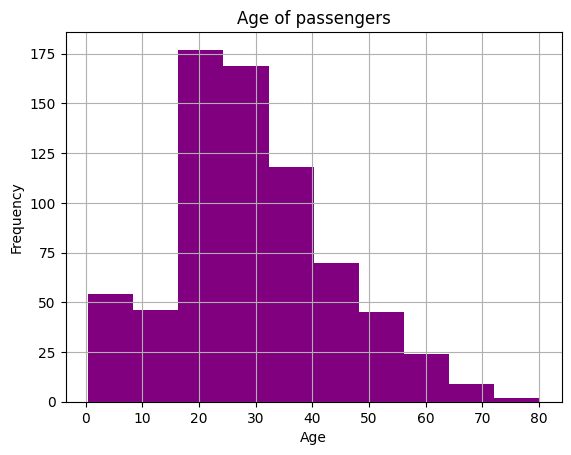

In [7]:
from matplotlib import pyplot as plt

train_df['Age'].hist(color="purple")
plt.title('Age of passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')

6.	Давайте разберемся с графой "Cabin". Сколько процентов значений пропущено?

In [8]:
print(round(train_df['Cabin'].isna().sum() / (train_df['Cabin'].isna().sum() + train_df['Cabin'].notna().sum()) * 100, 2), "%")

77.1 %


7.	Давайте разберемся с графой "Embarked" Сколько процентов значений пропущено?

In [9]:
print(round(train_df['Embarked'].isna().sum() / (train_df['Embarked'].isna().sum() + train_df['Embarked'].notna().sum()) * 100, 2), "%")

0.22 %


8.	Основываясь на оценке отсутствующих значений в наборе данных, внесите в данные следующие изменения. Если в строке отсутствует «Age», вставьте средний возраст. Если отсутствует «Embarked», замените его на наиболее распространенный порт посадки. Удалите столбец "Cabin"

In [10]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())

In [11]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [13]:
del train_df['Cabin']
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


9.	Выполните проверку на пустые значения. Таковых остаться не должно

In [14]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

10. Согласно словарю данных Kaggle, и SibSp, и Parch относятся к путешествиям с семьей. Для простоты (и для учета возможной мультиколлинеарности) объединим влияние этих переменных в один категориальный предиктор: путешествовал ли этот человек один или нет (0 или 1). Не забудьте удалить SibSp и Parch (Пока работаем с train_data)

In [15]:
train_df['Alone'] = (train_df['SibSp'] | train_df['Parch']).astype(int)
del train_df['SibSp']
del train_df['Parch']
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


11. Также создадим категориальные переменные для класса пассажира ("Pclass"), пола ("Sex") и порта посадки ("Embarked"). Используем функцию pd.get_dummies. Не забудьте удалить колонки, из которых делаете dummie-переменные

In [16]:
train_df = pd.get_dummies(train_df, columns=['Pclass', 'Sex', 'Embarked'])
train_df.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,Alone,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,1,0,0,1,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,1,1,0,0,1,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,0,0,0,1,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,1,1,0,0,1,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,0,0,0,1,0,1,0,0,1


12.	Теперь примените те же изменения к тестовым данным. Применим то же значение для «Возраст» в тестовых данных, что и для моих данных обучения (если отсутствует, возраст = 28). Уберем «Cabin» из тестовых данных. В переменной "Embarked" не было пропущенных значений. Добавим dummie переменные. Наконец, заполним 1 пропущенное значение для «Fare» с медианой 14,45

In [17]:
test_df['Age'] = train_df['Age'].fillna(28)
del test_df['Cabin']
test_df = pd.get_dummies(test_df, columns=['Pclass', 'Sex', 'Embarked'])
test_df['Fare'] = test_df['Fare'].fillna(train_df['Fare'].median())
test_df.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,"Kelly, Mr. James",22.0,0,0,330911,7.8292,0,0,1,0,1,0,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",38.0,1,0,363272,7.0000,0,0,1,1,0,0,0,1
2,894,"Myles, Mr. Thomas Francis",26.0,0,0,240276,9.6875,0,1,0,0,1,0,1,0
3,895,"Wirz, Mr. Albert",35.0,0,0,315154,8.6625,0,0,1,0,1,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",35.0,1,1,3101298,12.2875,0,0,1,1,0,0,0,1


13.	Оцените выживаемость Пассажиров до 16 лет

In [24]:
print("Survival rate up to 16 years: ", train_df[train_df['Age'] < 16]['Survived'].value_counts()[1] / train_df[train_df['Age'] < 16]['Survived'].value_counts().sum())

Survival rate up to 16 years:  0.5903614457831325


14.	Учитывая выживаемость пассажиров моложе 16 лет, включим в свой набор данных еще одну категориальную переменную: «IsMinor». Значение 1 - если меньше 16 лет, 0 - если больше

In [25]:
train_df['IsMinor'] = (train_df['Age'] < 16).astype(int)
final_train = train_df.copy()
train_df = pd.get_dummies(train_df, columns=['IsMinor'])
train_df.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,Alone,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,IsMinor_0,IsMinor_1
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,1,0,0,1,0,1,0,0,1,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,1,1,0,0,1,0,1,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,0,0,0,1,1,0,0,0,1,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,1,1,0,0,1,0,0,0,1,1,0
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,0,0,0,1,0,1,0,0,1,1,0


15.	Определите самый безопасный класс

In [27]:
print("Survival of class 1: ", train_df[train_df['Pclass_1'] == 1]['Survived'].value_counts()[1] / train_df[train_df['Pclass_1'] == 1]['Survived'].value_counts().sum())
print("Survival of class 2: ", train_df[train_df['Pclass_2'] == 1]['Survived'].value_counts()[1] / train_df[train_df['Pclass_2'] == 1]['Survived'].value_counts().sum())
print("Survival of class 3: ", train_df[train_df['Pclass_3'] == 1]['Survived'].value_counts()[1] / train_df[train_df['Pclass_3'] == 1]['Survived'].value_counts().sum())

Survival of class 1:  0.6296296296296297
Survival of class 2:  0.47282608695652173
Survival of class 3:  0.24236252545824846


16.	Определите, кому удалось выжить с большей вероятностью: кто путешествовал в одиночку или нет

In [28]:
print("Survival of Alone: ", train_df[train_df['Alone'] == 0]['Survived'].value_counts()[1] / train_df[train_df['Alone'] == 0]['Survived'].value_counts().sum())
print("Survival of NotAlone: ", train_df[train_df['Alone'] == 1]['Survived'].value_counts()[1] / train_df[train_df['Alone'] == 1]['Survived'].value_counts().sum())

Survival of Alone:  0.30353817504655495
Survival of NotAlone:  0.5642201834862385


### Выбор признаков для данных

C:\Users\Анна\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Selected features: ['Age', 'Alone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


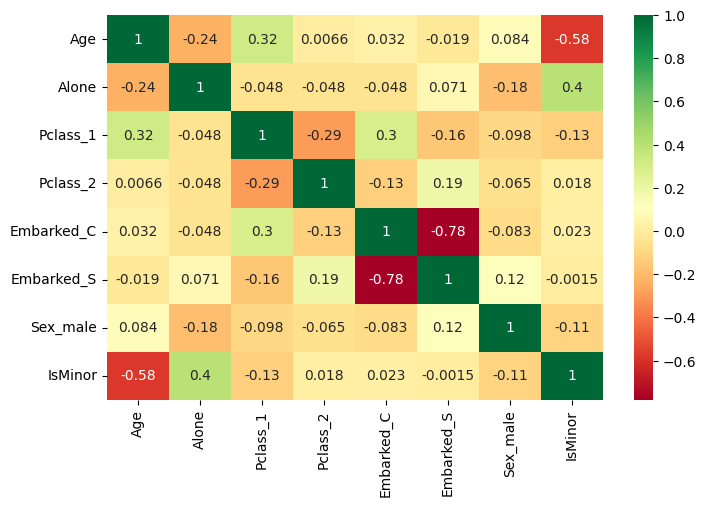

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns

cols = ["Age","Fare","Alone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X = final_train[cols]
y = final_train['Survived']
# Создайте logreg и вычислите важность функций
model = LogisticRegression()
# создайте модель RFE и выберите 8 атрибутов
rfe = RFE(estimator=model, n_features_to_select=8)
rfe = rfe.fit(X, y)
# резюмируем  выбор атрибутов
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected_features = ['Age', 'Alone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 
                     'Embarked_S', 'Sex_male', 'IsMinor']
X = final_train[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()


### Оценка модели на основе простого разделения train/test с использованием функции train_test_split()

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = final_train[Selected_features]
y = final_train['Survived']
	
# можно использовать разделение обучения/тестирования с разными значениями random_state
# мы можем изменить значения random_state, которые изменят показатели точности
# результаты сильно меняются, поэтому результаты тестирования являются оценкой с высокой дисперсией
# test_size разделяет выборку на тестовую и убучающую в соотношении 20/80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
	
# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))


Train/Test split results:
LogisticRegression accuracy is 0.788
LogisticRegression log_loss is 0.497
LogisticRegression auc is 0.838


### Оценка модели на основе K-fold cross-validation с использованием функции cross_val_score()

In [32]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Используем cross_val_score function
# Мы передаём полные X and y, а не X_train и y_train, функция сама разбивает данные
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} в качестве метрик оценивания результата (есть и другие)
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

C:\Users\Анна\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Анна\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

K-fold cross-validation results:
LogisticRegression average accuracy is 0.809
LogisticRegression average log_loss is 0.444
LogisticRegression average auc is 0.856


C:\Users\Анна\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Анна\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

### Оценка модели на основе K-fold cross-validation с использованием функции cross_validate()

In [33]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.809 (+/-0.027)
LogisticRegression average log_loss: 0.444 (+/-0.042)
LogisticRegression average auc: 0.856 (+/-0.030)


C:\Users\Анна\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Анна\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

### Работа с формулой Байеса

In [34]:
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
classifier = GaussianNB()
classifier.fit(X_train, y_train)
def cross_validate(estimator, train, validation):
    X_train = train[0]
    Y_train = train[1]
    X_val = validation[0]
    Y_val = validation[1]
    train_predictions = classifier.predict(X_train)
    train_accuracy = accuracy_score(train_predictions, Y_train)
    train_recall = recall_score(train_predictions, Y_train)
    train_precision = precision_score(train_predictions, Y_train)

    val_predictions = classifier.predict(X_val)
    val_accuracy = accuracy_score(val_predictions, Y_val)
    val_recall = recall_score(val_predictions, Y_val)
    val_precision = precision_score(val_predictions, Y_val)

    print('Model metrics')
    print('Accuracy  Train: %.2f, Validation: %.2f' % (train_accuracy, val_accuracy))
    print('Recall    Train: %.2f, Validation: %.2f' % (train_recall, val_recall))
    print('Precision Train: %.2f, Validation: %.2f' % (train_precision, val_precision))
    
cross_validate(classifier, (X_train, y_train), (X_test, y_test))

Model metrics
Accuracy  Train: 0.81, Validation: 0.78
Recall    Train: 0.72, Validation: 0.79
Precision Train: 0.78, Validation: 0.70


C:\Users\Анна\AppData\Local\Temp\ipykernel_8100\2403035047.py:2: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


### SVM

In [35]:
from sklearn.svm import SVC

classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, y_train)

# Predicting the result and giving the accuracy
score = classifier.score(X_test, y_test)

print(score)

0.5698324022346368


Посчитайте score, если train set будет состоять только из 3 переменных: ['Sex_male', 'Age', 'Pclass_1']

In [36]:
cols = ["Age","Pclass_1","Sex_male"] 
X = final_train[cols]
y = final_train['Survived']
# Создайте logreg и вычислите важность функций
model = LogisticRegression()
# создайте модель RFE и выберите 8 атрибутов
rfe = RFE(estimator=model, n_features_to_select=8)
rfe = rfe.fit(X, y)
# резюмируем  выбор атрибутов
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected_features = ['Age', 'Pclass_1', 'Sex_male']
X = final_train[Selected_features]

# create X (features) and y (response)
X = final_train[Selected_features]
y = final_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, y_train)

# Predicting the result and giving the accuracy
score = classifier.score(X_test, y_test)

print(score)

Selected features: ['Age', 'Pclass_1', 'Sex_male']
0.5698324022346368
